# Discente: **Jean Carlos de Carvalho Costa**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Configurações iniciais
np.random.seed()  # Define a semente baseada no relógio do sistema
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / np.sum(exp_logits, axis=-1, keepdims=True)

def cross_entropy_loss(probs, labels):
    return -np.sum(labels * np.log(probs + 1e-12), axis=1).mean()

# Dados iniciais
num_samples = 3
num_classes = 3
logits = np.random.uniform(0.1, 3.0, (num_samples, num_classes))
labels = np.eye(num_classes)  # One-hot encoded labels

def generate_pertubations(original_logits, std_dev):
    return [
        np.random.normal(loc=original_logits, scale=std_dev)
        for _ in range(4)
    ]

In [16]:
# Processo iterativo
std_dev = 0.5
num_iterations = 30
entropy_evolution = []

for iteration in range(num_iterations):
    #Aplica softmax e calcula cross-entropy para logits originais
    probs_originais = softmax(logits)
    loss_originais = cross_entropy_loss(probs_originais, labels)

    # Gera quatro novos conjuntos de logits pertubados
    perturbations = generate_pertubations(logits, std_dev)

    # Calcula as entropias para cada conjunto de logits
    all_logit_sets = [logits] + perturbations
    all_losses = []

    for perturbation_logits in all_logit_sets:
        probs = softmax(perturbation_logits)
        loss = cross_entropy_loss(probs, labels)
        all_losses.append(loss)

    # Ordena os conjuntos pelo valor da entropia e descarta os 4 piores
    sorted_indices = np.argsort(all_losses)
    logits = all_logit_sets[sorted_indices[0]]

    # Registra a menor entropia (melhor conjunto)
    entropy_evolution.append(all_losses[sorted_indices[0]])

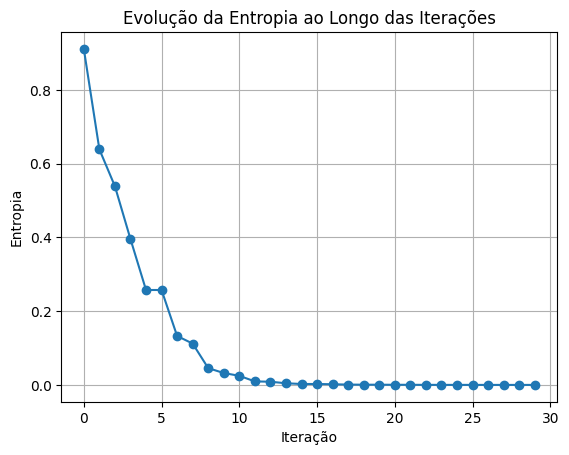

In [17]:
# Visualização da evolução da entropia
plt.plot(entropy_evolution, marker='o')
plt.title('Evolução da Entropia ao Longo das Iterações')
plt.xlabel('Iteração')
plt.ylabel('Entropia')
plt.grid()
plt.show()